In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.corpus.reader.wordnet import NOUN
from nltk.corpus import wordnet

from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

nltk.download('stopwords')
STOP_WORDS = list(stopwords.words('english'))

import re

import sklearn
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
reviews_df = pd.read_csv('/content/drive/MyDrive/Python/sandhiya/CSE573-Fake-Review-Detection-Group-6-main/CSE573-Fake-Review-Detection-Group-6-main/DATA/fake reviews dataset.csv')

In [4]:
reviews_df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [5]:
reviews_df.label.value_counts()

,count
label,
CG,20216
OR,20216


In [6]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

def lemmatize_text(text, lemmatizer):
    """Lemmatize verbs, then re-lemmatize the result."""
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return " ".join([lemmatizer.lemmatize(word) for word in lemmatized_words])

def stem_text(text, stemmer):
    """Stem the text."""
    return " ".join([stemmer.stem(word) for word in text.split()])

def remove_noise(text):
    """Remove unwanted characters and HTML tags from the text."""
    punctuations = """!\"#$%&'()*+/:;<=>?@[\\]^_.`{|}~"""
    words = text.split()
    cleaned_words = []

    for word in words:
        word = re.sub("(<.*?>)", "", word)

        if '-' not in word:
            word = re.sub("(\\W|\\d)", " ", word)
        else:
            word = ''.join([char for char in word if char not in punctuations])

        cleaned_words.append(word.strip())

    return " ".join(cleaned_words)

reviews_df["text_"] = reviews_df['text_'].str.lower()

lemmatizer = WordNetLemmatizer()
reviews_df["lemmatized_text"] = reviews_df["text_"].apply(lambda x: lemmatize_text(x, lemmatizer))

stemmer = PorterStemmer()
reviews_df["stemmed_text"] = reviews_df["lemmatized_text"].apply(lambda x: stem_text(x, stemmer))

reviews_df["cleaned_text"] = reviews_df["stemmed_text"].apply(remove_noise)

reviews_df['CleanedText'] = reviews_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in STOP_WORDS]))


In [7]:
'''
4. Get all the extra features.
	1. Semantic Relevance( Too negative or too positive)
	2. Word count
	3. character count
	4. Number of capitalized letters.
	5. Number of exclamation points or question marks.
	6. Punctuation count
	7. Part of speech count
	8. Readability metrics
		1. Flesch-Kincaid Grade Level or Automated Readability Index
		2. information about the readability and complexity of the text.
5. Perform PCA
'''

'\n4. Get all the extra features.\n\t1. Semantic Relevance( Too negative or too positive)\n\t2. Word count\n\t3. character count\n\t4. Number of capitalized letters.\n\t5. Number of exclamation points or question marks.\n\t6. Punctuation count\n\t7. Part of speech count\n\t8. Readability metrics\n\t\t1. Flesch-Kincaid Grade Level or Automated Readability Index\n\t\t2. information about the readability and complexity of the text.\n5. Perform PCA\n'

In [8]:
from textblob import TextBlob

def categorize_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

reviews_df['sentiment'] = reviews_df['text_'].apply(categorize_sentiment)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive


In [9]:
discrepancy_df = reviews_df[((reviews_df['sentiment'] == 'Positive') & (reviews_df['rating'] < 3)) |
                            ((reviews_df['sentiment'] == 'Negative') & (reviews_df['rating'] > 3))]

discrepancy_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive
10,Home_and_Kitchen_5,5.0,CG,as advertised. 5th one i've had. the only prob...,a advertised. 5th one i've had. the only probl...,a advertised. 5th one i'v had. the onli proble...,a advertised th one i v had the onli problem b...,advertised th one v onli problem realli,Negative
41,Home_and_Kitchen_5,2.0,CG,sheet color is nice buy for my size for my tow...,sheet color be nice buy for my size for my town.,sheet color be nice buy for my size for my town.,sheet color be nice buy for my size for my town,sheet color nice buy size town,Positive
53,Home_and_Kitchen_5,5.0,CG,got these for the third time. i have a small ...,get these for the third time. i have a small d...,get these for the third time. i have a small d...,get these for the third time i have a small do...,get third time small dog son love throw,Negative
64,Home_and_Kitchen_5,1.0,OR,"super rough, not soft wash cloths, more like b...","super rough, not soft wash cloths, more like b...","super rough, not soft wash cloths, more like b...",super rough not soft wash cloths more like bar...,super rough soft wash cloths like bar towel,Positive


In [10]:
def semantic_relevance(sentiment, rating):
    if (sentiment == 'Positive' and rating >= 4) or (sentiment == 'Negative' and rating <= 2):
        return 'High Relevance'
    elif sentiment == 'Neutral' or rating == 3:
        return 'Medium Relevance'
    elif (sentiment == 'Positive' and rating <= 2) or (sentiment == 'Negative' and rating >= 4):
        return 'Low Relevance'
    else:
        return 'Uncategorized'

reviews_df['semantic_relevance'] = reviews_df.apply(lambda row: semantic_relevance(row['sentiment'], row['rating']), axis=1)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance


In [11]:
def word_count(text):
    return len(text.split())
reviews_df['word_count'] = reviews_df['text_'].apply(word_count)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,word_count
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,12
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,16
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,14
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,17
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,18


In [12]:
def character_count(text):
    return len(text)

reviews_df['character_count'] = reviews_df['text_'].apply(character_count)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,word_count,character_count
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,12,75
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,16,80
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,14,67
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,17,81
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,18,85


In [13]:
def capitalized_letters_count(text):
    return sum(1 for c in text if c.isupper())

reviews_df['capitalized_count'] = reviews_df['text_'].apply(capitalized_letters_count)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,word_count,character_count,capitalized_count
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,12,75,0
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,16,80,0
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,14,67,0
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,17,81,0
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,18,85,0


In [14]:
def exclamation_question_count(text):
    return sum(1 for c in text if c in ['!', '?'])

reviews_df['exclamation_question_count'] = reviews_df['text_'].apply(exclamation_question_count)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,12,75,0,2
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,16,80,0,0
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,14,67,0,0
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,17,81,0,1
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,18,85,0,0


In [15]:
import string
def punctuation_count(text):
    return sum(1 for c in text if c in string.punctuation)

reviews_df['punctuation_count'] = reviews_df['text_'].apply(punctuation_count)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count,punctuation_count
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,12,75,0,2,5
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,16,80,0,0,3
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,14,67,0,0,2
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,17,81,0,1,2
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,18,85,0,0,2


In [16]:
import nltk
from collections import Counter
import pandas as pd
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
import nltk
nltk.download('punkt_tab')

def part_of_speech_count(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    counts = Counter(tag for word, tag in pos_tags)
    return counts

reviews_df['pos_counts'] = reviews_df['text_'].apply(part_of_speech_count)

pos_counts_df = reviews_df['pos_counts'].apply(pd.Series)

reviews_df = pd.concat([reviews_df, pos_counts_df], axis=1)

reviews_df.head()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,...,SYM,EX,),RBS,FW,(,#,WP$,LS,NNPS
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.9 MB/s eta 0:00:00


In [18]:
import textstat
import pandas as pd

def readability_metrics(text):
    return {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'gunning_fog': textstat.gunning_fog(text),
        'smog_index': textstat.smog_index(text),
        'automated_readability_index': textstat.automated_readability_index(text),
        'coleman_liau_index': textstat.coleman_liau_index(text),
        'dale_chall_readability_score': textstat.dale_chall_readability_score(text)
    }

reviews_df['readability'] = reviews_df['text_'].apply(readability_metrics)

# Convert the dictionaries to a DataFrame
readability_df = pd.DataFrame(reviews_df['readability'].tolist())

# Merge with the original DataFrame
reviews_df = pd.concat([reviews_df, readability_df], axis=1)

# Optionally, you can drop the original 'readability' column if it's no longer needed
reviews_df = reviews_df.drop('readability', axis=1)

# Display the first few rows
reviews_df.head()


,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,...,WP$,LS,NNPS,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,...,NaN,NaN,NaN,90.77,2.1,5.73,0.0,5.9,6.72,6.57
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,...,NaN,NaN,NaN,88.74,2.9,5.70,0.0,1.4,2.45,7.98
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,...,NaN,NaN,NaN,106.67,0.1,2.80,0.0,0.3,1.57,5.11
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,...,NaN,NaN,NaN,79.60,6.4,9.15,0.0,4.8,3.59,7.27
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,...,NaN,NaN,NaN,104.64,0.9,5.82,0.0,0.9,2.23,5.84


In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Create a LabelEncoder object
le_sentiment = LabelEncoder()
le_semantic_relevance = LabelEncoder()

# Fit and transform the 'sentiment' column
reviews_df['sentiment_encoded'] = le_sentiment.fit_transform(reviews_df['sentiment'])

# Fit and transform the 'semantic_relevance' column
reviews_df['semantic_relevance_encoded'] = le_semantic_relevance.fit_transform(reviews_df['semantic_relevance'])

# Display the first few rows to verify the encoding
reviews_df.head()

reviews_df.fillna(0, inplace=True)


In [20]:
column_names = reviews_df.columns.tolist()
print("Column Names:", column_names)

Column Names: ['category', 'rating', 'label', 'text_', 'lemmatized_text', 'stemmed_text', 'cleaned_text', 'CleanedText', 'sentiment', 'semantic_relevance', 'word_count', 'character_count', 'capitalized_count', 'exclamation_question_count', 'punctuation_count', 'pos_counts', 'VB', 'DT', '.', 'RB', 'VBN', ',', 'JJ', 'CC', 'NN', 'VBP', 'PRP', 'IN', 'NNS', 'VBD', 'PRP$', 'VBG', 'WRB', 'TO', 'VBZ', 'CD', 'JJR', '``', '$', "''", 'MD', 'RP', 'WP', 'UH', ':', 'RBR', 'PDT', 'JJS', 'WDT', 'POS', 'NNP', 'SYM', 'EX', ')', 'RBS', 'FW', '(', '#', 'WP$', 'LS', 'NNPS', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index', 'coleman_liau_index', 'dale_chall_readability_score', 'sentiment_encoded', 'semantic_relevance_encoded']


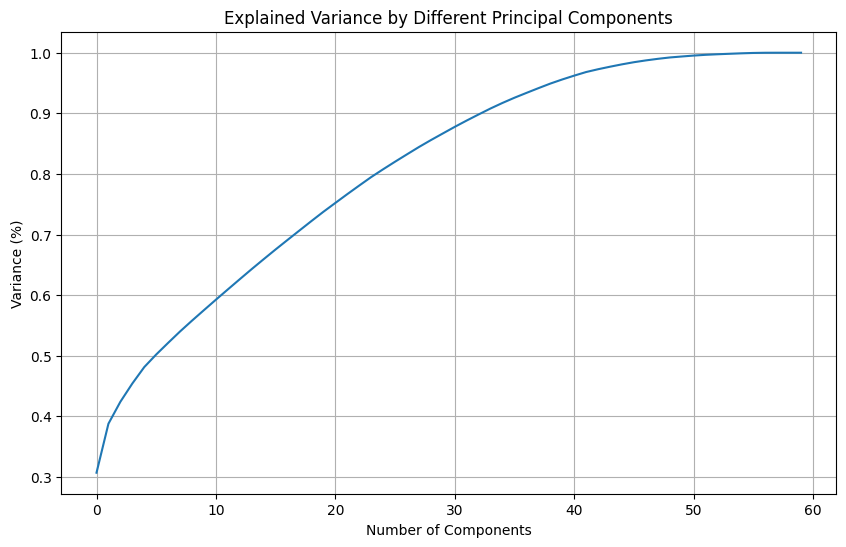

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming 'reviews_df' is a pre-defined DataFrame with numerical features

# Select all numeric columns
numerical_features = reviews_df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_features)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'reviews_df' is your DataFrame

# Select all numeric columns
numerical_features = reviews_df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Perform PCA with 40 components
pca = PCA(n_components=40)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
column_names = [f'PC{i+1}' for i in range(40)]  # Generates PC1, PC2, ..., PC40
pca_df = pd.DataFrame(data=principal_components, columns=column_names)



In [23]:
reviews_df_reset = reviews_df.reset_index(drop=True)
combined_df = pd.concat([reviews_df_reset, pca_df], axis=1)
combined_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,...,0.453179,-0.302449,-0.723997,-0.285891,0.147164,-0.073054,0.450939,-0.130718,0.071797,-0.111493
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,...,0.361678,0.091364,-0.448103,-0.067810,0.152155,0.100008,0.200941,-0.138285,0.223359,0.312850
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,...,-0.032627,-0.100469,-0.381030,0.197660,-0.228100,0.042760,0.085769,0.013475,-0.113090,-0.188620
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,...,0.192131,-0.320948,0.241097,-0.326349,-0.208896,-0.020397,-0.218098,-1.324096,-0.117941,0.312803
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,...,0.495580,0.109892,-0.206107,-0.290772,-0.127746,0.631337,0.290962,-0.181045,0.162414,-0.077705


#Bag of Words on uncleaned data

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

bow_vect=CountVectorizer()

# On Uncleaned data
bow=bow_vect.fit_transform(combined_df['text_'].values)

In [25]:
bow

<40432x41099 sparse matrix of type '<class 'numpy.int64'>'
	with 1681263 stored elements in Compressed Sparse Row format>

In [26]:
bow.shape

(40432, 41099)

#Tf-idf on uncleaned data

In [27]:
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(combined_df['text_'].values)

In [28]:
tfidf.shape

(40432, 41099)

# Bow on cleaned data


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vect = CountVectorizer()
bow = bow_vect.fit_transform(combined_df['CleanedText'].astype(str).values)

In [30]:
bow.shape

(40432, 36919)

In [31]:
#On 2000 data points
from sklearn.manifold import TSNE
X = bow[:2000, :].toarray()

In [32]:
tsne = TSNE(n_components = 2, perplexity = 20).fit_transform(X)
df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df = pd.concat([df, combined_df['label'].iloc[:2000]], axis = 1)

Text(0.5, 1.0, 'Perplexity = 20')

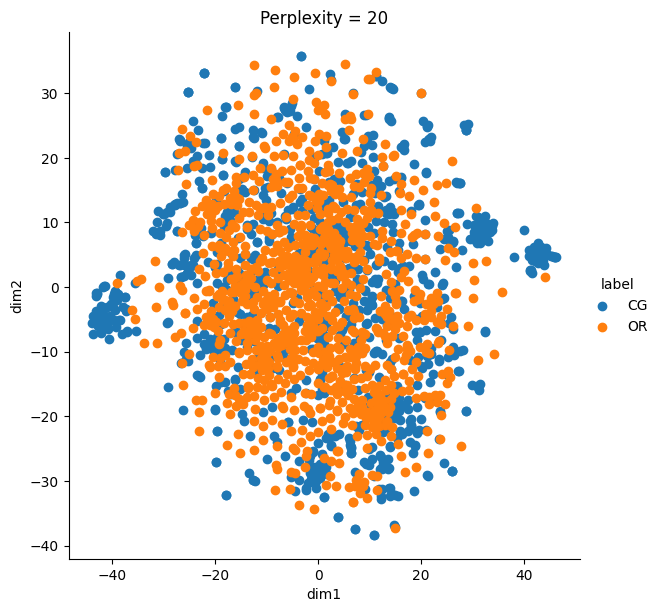

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.FacetGrid(df, hue = 'label', height = 6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 20')

#TF-IDF on cleaned data


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vect=TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(combined_df['CleanedText'].astype(str).values)

In [35]:
tfidf.shape

(40432, 36919)

In [36]:
#On 2000 data points
Y = tfidf[:2000, :].toarray()

Text(0.5, 1.0, 'Perplexity = 20')

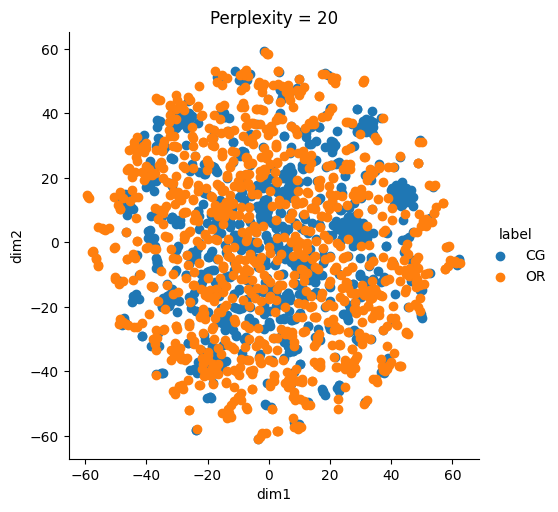

In [37]:
tsne = TSNE(n_components = 2, perplexity = 20).fit_transform(Y)
df1 = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df1 = pd.concat([df1, combined_df['label'].iloc[:2000]], axis = 1)
sns.FacetGrid(df1, hue = 'label', height = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 20')

#Applying Word2Vec

In [38]:
list_of_sent = []
for i in range(len(combined_df['CleanedText'])):
    list_of_sent.append(str(combined_df['CleanedText'][i]).split())

In [39]:
list_of_sent

[['love',
  'well',
  'made',
  'sturdy',
  'veri',
  'comfortable',
  'love',
  'veri',
  'pretti'],
 ['love', 'great', 'upgrad', 'original', 'v', 'mine', 'coupl', 'year'],
 ['thi', 'pillow', 'save', 'back', 'love', 'look', 'feel', 'thi', 'pillow'],
 ['miss', 'inform', 'use', 'great', 'product', 'price'],
 ['veri', 'nice', 'set', 'good', 'quality', 'set', 'two', 'month'],
 ['want', 'differ', 'flavor'],
 ['perfect', 'touch', 'onli', 'thing', 'wish', 'littl', 'space'],
 ['fit', 'well', 'look', 'great', 'love', 'smooth', 'edg', 'extra'],
 ['great', 'big', 'number', 'easi', 'read', 'onli', 'thing', 'like', 'size'],
 ['son', 'love', 'thi', 'comfort', 'veri', 'well', 'made', 'also', 'babi'],
 ['advertised', 'th', 'one', 'v', 'onli', 'problem', 'realli'],
 ['veri', 'handi', 'one', 'kid', 'tool', 'includ', 'package', 'one'],
 ['someon', 'say', 'orient', 'great', 'product'],
 ['flimsy', 'qualiti', 'would', 'expect', 'piec', 'furniture'],
 ['make', 'may', 'tea', 'stirring', 'onli', 'problem', '

In [40]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,vector_size=50, workers=-1)

In [41]:
words = list(w2v_model.wv.index_to_key)
print(len(words))

11132


In [42]:
def calc_avg_w2v(list_of_sent, w2v_model):
    sent_vectors = []
    for sent in list_of_sent:
        sent_vec = np.zeros(100)
        cnt_words = 0
        for word in sent:
            if word in w2v_model.wv:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    return sent_vectors

In [43]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5, workers=4)

In [44]:
import numpy as np
sent_vectors = calc_avg_w2v(list_of_sent, w2v_model)

In [45]:
sent_vectors

[array([-1.82890053e-01, -1.29222097e+00,  3.05123031e-01,  1.93351563e-01,
         1.89438375e+00, -4.22876418e-01, -6.88453248e-02, -4.04688087e-01,
        -2.45785036e-01, -1.58120082e+00, -1.78739379e-02,  6.99167877e-01,
        -1.39368110e+00, -1.20714635e+00,  3.73248347e-01,  1.31174770e-01,
         1.14285280e+00,  1.36971937e-02, -4.90943768e-01, -7.34325846e-01,
        -3.60364029e-01,  1.43131257e+00,  4.18553270e-02, -1.20352454e-01,
         8.77338615e-01,  3.57070937e-01, -5.92780684e-02,  1.08080773e+00,
        -4.56471972e-01,  1.52995556e+00,  1.20568707e+00, -8.02609994e-01,
        -3.44266397e-01, -7.29771867e-01, -5.49027691e-01,  1.81401969e-01,
        -6.85488785e-01, -4.72371053e-01,  3.97837932e-01,  1.12162954e+00,
         5.68923202e-01, -2.21929597e+00,  5.38422830e-04,  4.77292822e-01,
        -7.07357294e-01, -5.52119592e-01,  1.29240108e+00, -7.76262494e-01,
         4.95317641e-01, -7.00232767e-01,  6.69951441e-01, -7.82864531e-01,
         5.4

In [46]:
combined_df.to_csv('/content/drive/MyDrive/Python/sandhiya/CSE573-Fake-Review-Detection-Group-6-main/CSE573-Fake-Review-Detection-Group-6-main/CODE/final_data1.csv')

combined df
category: The category of the product being reviewed

rating: Numerical rating given to the product

label: A label assigned to the review

text_: Original text of the product review.

lemmatized_text: The review text after lemmatization

stemmed_text: The review text after stemming

cleaned_text: Text after undergoing cleaning processes, like removing punctuation or special characters.

CleanedText: cleanedtext after removing STOPWORDS

sentiment: Categorical sentiment derived from the review text



PC1 PC2 - **PCA**

'flesch_reading_ease', 'flesch_kincaid_grade',
'gunning_fog', 'smog_index', 'automated_readability_index',
'coleman_liau_index', 'dale_chall_readability_score',
'sentiment_encoded', 'semantic_relevance_encoded' - **Readability Metrics**

'pos_counts', 'VB', 'DT', '.', 'RB', 'VBN', ',', 'JJ', 'CC', 'NN', 'VBP', 'PRP', 'IN', 'NNS', 'VBD', 'PRP$', 'VBG', 'WRB', 'TO', 'VBZ', 'CD', 'JJR', '``', '$', '''', 'MD', 'RP', 'WP', 'UH', ':', 'RBR', 'PDT', 'JJS', 'WDT', 'POS', 'NNP', 'SYM', 'EX', ')', 'RBS', 'FW', '(', '#', 'WP$', 'LS', 'NNPS' - **Part of Speech tags**

POS tags - https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk

In [47]:
combined_df.columns

Index(['category', 'rating', 'label', 'text_', 'lemmatized_text',
       'stemmed_text', 'cleaned_text', 'CleanedText', 'sentiment',
       'semantic_relevance',
       ...
       'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39',
       'PC40'],
      dtype='object', length=110)

# Model Training

In [48]:
final_reviews_df = pd.read_csv('/content/drive/MyDrive/Python/sandhiya/CSE573-Fake-Review-Detection-Group-6-main/CSE573-Fake-Review-Detection-Group-6-main/CODE/final_data1.csv')

In [49]:
from sklearn.preprocessing import LabelEncoder

numerical_features = final_reviews_df.select_dtypes(include=[np.number])


# Label encoding for labels
encoder = LabelEncoder()
encoder.fit(final_reviews_df['label'])
final_reviews_df['label'] = encoder.transform(final_reviews_df['label'])

# Select only categorical features
categorical_features = final_reviews_df[['category', 'sentiment', 'semantic_relevance']]


In [50]:
#one hot encoding
one_hot_encoded = pd.get_dummies(categorical_features, prefix=['category', 'sentiment', 'semantic_relevance'])
pca_columns = final_reviews_df.filter(regex='^PC\d+$')
pc_columns = [f'PC{i}' for i in range(1, 41)]
pca_columns[pc_columns] = pca_columns[pc_columns].apply(pd.to_numeric, errors='coerce')
pca_columns[pc_columns] = pca_columns[pc_columns].fillna(pca_columns[pc_columns].mean())

<ipython-input-50-e18dd8f7786f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_columns[pc_columns] = pca_columns[pc_columns].apply(pd.to_numeric, errors='coerce')
<ipython-input-50-e18dd8f7786f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_columns[pc_columns] = pca_columns[pc_columns].fillna(pca_columns[pc_columns].mean())


In [51]:
df_with_PCA = pd.concat([one_hot_encoded, pca_columns, final_reviews_df['label']], axis=1)
df_with_PCA.head()

,category_Books_5,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,category_Home_and_Kitchen_5,category_Kindle_Store_5,category_Movies_and_TV_5,category_Pet_Supplies_5,category_Sports_and_Outdoors_5,category_Tools_and_Home_Improvement_5,category_Toys_and_Games_5,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,label
0,False,False,False,True,False,False,False,False,False,False,...,-0.302449,-0.723997,-0.285891,0.147164,-0.073054,0.450939,-0.130718,0.071797,-0.111493,0
1,False,False,False,True,False,False,False,False,False,False,...,0.091364,-0.448103,-0.067810,0.152155,0.100008,0.200941,-0.138285,0.223359,0.312850,0
2,False,False,False,True,False,False,False,False,False,False,...,-0.100469,-0.381030,0.197660,-0.228100,0.042760,0.085769,0.013475,-0.113090,-0.188620,0
3,False,False,False,True,False,False,False,False,False,False,...,-0.320948,0.241097,-0.326349,-0.208896,-0.020397,-0.218098,-1.324096,-0.117941,0.312803,0
4,False,False,False,True,False,False,False,False,False,False,...,0.109892,-0.206107,-0.290772,-0.127746,0.631337,0.290962,-0.181045,0.162414,-0.077705,0


In [52]:
SEED = 0
train = df_with_PCA.sample(frac=0.8, random_state = SEED)
test = df_with_PCA.drop(train.index)

In [53]:
X_train = train.drop('label', axis=1)  # Features (excluding the 'label' column)
y_train = train['label']
X_test= test.drop('label', axis=1)
y_test= test['label']
X_train.head()

,category_Books_5,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,category_Home_and_Kitchen_5,category_Kindle_Store_5,category_Movies_and_TV_5,category_Pet_Supplies_5,category_Sports_and_Outdoors_5,category_Tools_and_Home_Improvement_5,category_Toys_and_Games_5,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
7690,False,False,False,False,False,False,False,True,False,False,...,-0.172851,-1.490920,-0.402284,0.887081,-2.557670,-1.641267,1.772270,1.093240,0.130956,-0.705495
23859,False,False,False,False,True,False,False,False,False,False,...,-0.010784,-0.002897,-0.444728,0.057847,0.159042,-0.077125,0.125905,-0.014327,-0.212609,0.027911
19138,False,False,False,False,False,False,False,False,True,False,...,1.890627,0.468183,-1.378723,0.012022,-1.965816,3.190603,0.304400,-0.010597,-1.362760,0.215563
11714,False,False,True,False,False,False,False,False,False,False,...,0.839335,0.640123,0.139822,1.405355,-0.186191,-0.288932,0.507382,-1.068334,-0.670127,-1.286942
36539,False,False,False,False,False,False,False,False,False,True,...,0.442747,-0.232406,-2.340552,-1.198724,2.371439,-0.415509,-2.334078,-0.107667,-0.306078,0.294982


In [54]:
y_train.head()

,label
7690,1
23859,1
19138,0
11714,1
36539,1


In [55]:
nan_counts = X_train.isna().sum()

# If you want the total count of NaN values in the entire DataFrame
total_nan_count = X_train.isna().sum().sum()
print(nan_counts)

print("\nTotal NaN count in the entire DataFrame:", total_nan_count)

category_Books_5                         0
category_Clothing_Shoes_and_Jewelry_5    0
category_Electronics_5                   0
category_Home_and_Kitchen_5              0
category_Kindle_Store_5                  0
category_Movies_and_TV_5                 0
category_Pet_Supplies_5                  0
category_Sports_and_Outdoors_5           0
category_Tools_and_Home_Improvement_5    0
category_Toys_and_Games_5                0
sentiment_Negative                       0
sentiment_Neutral                        0
sentiment_Positive                       0
semantic_relevance_High Relevance        0
semantic_relevance_Low Relevance         0
semantic_relevance_Medium Relevance      0
PC1                                      0
PC2                                      0
PC3                                      0
PC4                                      0
PC5                                      0
PC6                                      0
PC7                                      0
PC8        

In [56]:
for column in X_train.columns:
    unique_values = X_train[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in category_Books_5: [False  True]
Unique values in category_Clothing_Shoes_and_Jewelry_5: [False  True]
Unique values in category_Electronics_5: [False  True]
Unique values in category_Home_and_Kitchen_5: [False  True]
Unique values in category_Kindle_Store_5: [False  True]
Unique values in category_Movies_and_TV_5: [False  True]
Unique values in category_Pet_Supplies_5: [False  True]
Unique values in category_Sports_and_Outdoors_5: [ True False]
Unique values in category_Tools_and_Home_Improvement_5: [False  True]
Unique values in category_Toys_and_Games_5: [False  True]
Unique values in sentiment_Negative: [False  True]
Unique values in sentiment_Neutral: [False  True]
Unique values in sentiment_Positive: [ True False]
Unique values in semantic_relevance_High Relevance: [False  True]
Unique values in semantic_relevance_Low Relevance: [False  True]
Unique values in semantic_relevance_Medium Relevance: [ True False]
Unique values in PC1: [ 9.88967131 -3.12956654  5.80561

# Ensemble Learning

Bagging with Random Forest

In [57]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=SEED)
param_grid = {
    'n_estimators': [100, 250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(1,10)),
    'criterion' :['gini', 'entropy']
}
rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2, scoring='accuracy',return_train_score=False, verbose = 3)
rfc_model = rfc.fit(X_train, y_train)
print(rfc.cv_results_, rfc.best_params_, "\n", rfc.best_score_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2] END criterion=gini, max_depth=1, max_features=auto, n_estimators=100;, score=nan total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, max_features=auto, n_estimators=100;, score=nan total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=1, max_features=auto, n_estimators=250;, score=nan total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, max_features=auto, n_estimators=250;, score=nan total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100;, score=0.745 total time=   1.6s
[CV 2/2] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100;, score=0.747 total time=   1.1s
[CV 1/2] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=250;, score=0.748 total time=   3.2s
[CV 2/2] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=250;, score=0.749 total time=   3.7s
[CV 1/2] END criterion=gini, max_depth=1, max_features=lo

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

{'mean_fit_time': array([1.93582773e-02, 1.52573586e-02, 1.30567598e+00, 3.38532877e+00,
       8.69010568e-01, 2.14205432e+00, 4.59754467e-03, 4.18055058e-03,
       1.99457049e+00, 5.34665155e+00, 1.47568548e+00, 4.10902178e+00,
       4.73105907e-03, 3.94058228e-03, 2.79158151e+00, 7.55206513e+00,
       2.39621902e+00, 5.52291870e+00, 6.13629818e-03, 5.51474094e-03,
       3.51751041e+00, 1.01528460e+01, 2.61868834e+00, 7.04019439e+00,
       4.54974174e-03, 3.98313999e-03, 4.84357071e+00, 1.11803559e+01,
       3.73245776e+00, 8.38087511e+00, 5.34629822e-03, 3.96955013e-03,
       5.59338713e+00, 1.37585381e+01, 3.61666214e+00, 1.03578479e+01,
       4.65345383e-03, 4.15337086e-03, 6.32791078e+00, 1.54217284e+01,
       4.53407753e+00, 1.11868407e+01, 4.56881523e-03, 4.09615040e-03,
       6.98278010e+00, 1.77534400e+01, 4.70636916e+00, 1.26909372e+01,
       4.41479683e-03, 3.80790234e-03, 7.58133972e+00, 1.92364060e+01,
       5.71031892e+00, 1.39128114e+01, 4.76098061e-03, 4.84

In [58]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support as score, classification_report
y_pred = rfc.best_estimator_.predict(X_test)
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Precision:  {}".format(precision))
print("Recall:  {}".format( recall))
print("F1 score:  {}\n\n".format( fscore))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score is 0.7797427652733119
Precision:  0.7797427652733119
Recall:  0.7797427652733119
F1 score:  0.7797427652733119


Classification report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78      4050
           1       0.79      0.76      0.78      4036

    accuracy                           0.78      8086
   macro avg       0.78      0.78      0.78      8086
weighted avg       0.78      0.78      0.78      8086



Boosting with ADA Boost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada =AdaBoostClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}
ada = GridSearchCV(ada, param_grid, cv=3, n_jobs=-1)
ada_model = ada.fit(X_train, y_train)

print(ada.cv_results_, ada.best_params_, "\n", ada.best_score_)

{'mean_fit_time': array([12.75894101, 24.95902133, 49.80404504, 12.26629186, 26.32397445,
       50.70546571, 12.48860876, 25.4861811 , 46.06685869]), 'std_fit_time': array([0.45852381, 1.21912231, 0.07874603, 0.68289367, 0.12469652,
       0.20402434, 0.85892798, 0.97673692, 6.15828844]), 'mean_score_time': array([0.10566576, 0.16066551, 0.31987762, 0.1109546 , 0.20363522,
       0.31575871, 0.11329365, 0.23041026, 0.32285166]), 'std_score_time': array([0.03188791, 0.01095866, 0.0141814 , 0.03942577, 0.06325961,
       0.01151918, 0.04081195, 0.05048325, 0.10178326]), 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=1e+20), 'param_n_estimators': masked_array(data=[50, 100, 200, 50, 100, 200, 50, 100, 200],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=9999

In [60]:
y_pred = ada.best_estimator_.predict(X_test)
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Precision:  {}".format(precision))
print("Recall:  {}".format( recall))
print("F1 score:  {}\n\n".format( fscore))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score is 0.7757853079396487
Precision:  0.7757853079396487
Recall:  0.7757853079396487
F1 score:  0.7757853079396487


Classification report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      4050
           1       0.78      0.77      0.77      4036

    accuracy                           0.78      8086
   macro avg       0.78      0.78      0.78      8086
weighted avg       0.78      0.78      0.78      8086



# Classification Algorithms

SVM

In [61]:
from sklearn.svm import SVC
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf', 'poly', 'sigmoid']}

svc = GridSearchCV(SVC(), param_grid, cv=2, scoring='accuracy', verbose = 3)
svm_mod = svc.fit(X_train, y_train)
print(svc.cv_results_, svc.best_params_, "\n", svc.best_score_)

Fitting 2 folds for each of 21 candidates, totalling 42 fits
[CV 1/2] END ...............C=0.001, kernel=rbf;, score=0.652 total time=  43.7s
[CV 2/2] END ...............C=0.001, kernel=rbf;, score=0.652 total time=  45.2s
[CV 1/2] END ..............C=0.001, kernel=poly;, score=0.547 total time=  25.4s
[CV 2/2] END ..............C=0.001, kernel=poly;, score=0.542 total time=  22.8s
[CV 1/2] END ...........C=0.001, kernel=sigmoid;, score=0.676 total time=  44.2s
[CV 2/2] END ...........C=0.001, kernel=sigmoid;, score=0.661 total time=  43.3s
[CV 1/2] END ................C=0.01, kernel=rbf;, score=0.750 total time=  36.7s
[CV 2/2] END ................C=0.01, kernel=rbf;, score=0.745 total time=  34.5s
[CV 1/2] END ...............C=0.01, kernel=poly;, score=0.584 total time=  23.1s
[CV 2/2] END ...............C=0.01, kernel=poly;, score=0.574 total time=  21.6s
[CV 1/2] END ............C=0.01, kernel=sigmoid;, score=0.691 total time=  30.5s
[CV 2/2] END ............C=0.01, kernel=sigmoid;

In [62]:
y_pred = svc.best_estimator_.predict(X_test)
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Precision:  {}".format(precision))
print("Recall:  {}".format( recall))
print("F1 score:  {}\n\n".format( fscore))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score is 0.8263665594855305
Precision:  0.8263665594855305
Recall:  0.8263665594855305
F1 score:  0.8263665594855305


Classification report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83      4050
           1       0.85      0.79      0.82      4036

    accuracy                           0.83      8086
   macro avg       0.83      0.83      0.83      8086
weighted avg       0.83      0.83      0.83      8086




Multinominal Naive Bayes

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
alpha_value = 0.1
nb_model = MultinomialNB(alpha=alpha_value)
nb_model.fit(X_train_scaled, y_train)


MultinomialNB(alpha=0.1)

In [64]:
y_pred = nb_model.predict(X_test)
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Precision:  {}".format(precision))
print("Recall:  {}".format( recall))
print("F1 score:  {}\n\n".format( fscore))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score is 0.5672767746722731
Precision:  0.5672767746722731
Recall:  0.5672767746722731
F1 score:  0.5672767746722731


Classification report:
               precision    recall  f1-score   support

           0       0.55      0.74      0.63      4050
           1       0.60      0.39      0.47      4036

    accuracy                           0.57      8086
   macro avg       0.58      0.57      0.55      8086
weighted avg       0.58      0.57      0.55      8086



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
param_grid = {'penalty': ['l2', 'elasticnet'], 'C': [0.001,0.01,0.1,1,10,100]}
lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='accuracy',return_train_score=False, verbose = 1)
lr_model = lr.fit(X_train, y_train)
print(lr.cv_results_, lr.best_params_, "\n", lr.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

{'mean_fit_time': array([0.08980126, 0.00526509, 0.12332125, 0.0052494 , 0.16261888,
       0.00549679, 0.20053296, 0.00581737, 0.22545071, 0.00537014,
       0.5964705 , 0.01054916]), 'std_fit_time': array([2.57674441e-02, 2.03818888e-04, 8.98136960e-03, 1.93827859e-04,
       1.27879399e-02, 2.17912776e-04, 1.46155327e-02, 8.24688857e-04,
       4.03344822e-02, 1.54369135e-04, 2.68410195e-01, 1.38200200e-03]), 'mean_score_time': array([0.00541039, 0.        , 0.00522385, 0.        , 0.00562158,
       0.        , 0.00631781, 0.        , 0.00604453, 0.        ,
       0.01007867, 0.        ]), 'std_score_time': array([0.00021768, 0.        , 0.0001851 , 0.        , 0.00014837,
       0.        , 0.00162746, 0.        , 0.0009251 , 0.        ,
       0.00253072, 0.        ]), 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1.0, 1.0, 10.0,
                   10.0, 100.0, 100.0],
             mask=[False, False, False, False, False, False, False, False,
                

In [ ]:
y_pred = lr.best_estimator_.predict(X_test)
print("Accuracy score is {}".format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Precision:  {}".format(precision))
print("Recall:  {}".format( recall))
print("F1 score:  {}\n\n".format( fscore))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score is 0.7849369280237447
Precision:  0.7849369280237447
Recall:  0.7849369280237447
F1 score:  0.7849369280237447


Classification report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      4050
           1       0.80      0.76      0.78      4036

    accuracy                           0.78      8086
   macro avg       0.79      0.78      0.78      8086
weighted avg       0.79      0.78      0.78      8086

